### Importing Libraries and setting env variables

In [1]:
import os
from groq import Groq
from dotenv import load_dotenv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

load_dotenv()

api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=api_key)

### Prompting Model

In [2]:
def get_code_from_model(query):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a professional Python developer. "
                    "Answer all queries by generating only valid and clean Python code. "
                    "Do not provide any explanation or comments.\n\n"
                    "You have access to a dataset stored in 'household_power_consumption.csv'. "
                    "Load it in a DataFrame `df` as follows:\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)\n\n"
                    "Clean it using:\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n\n"
                    "Columns in dataframe `df` are :  'Global_active_power', 'Global_reactive_power', 'Voltage', "
                    "'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'. "
                    "The index is 'datetime' "
                    "All columns have floating point values and datetime is the index."
                    "Give me full code and start from loading the data."
                )
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="qwen-qwq-32b",
        temperature=0,
        top_p=1,
    )

    response = chat_completion.choices[0].message.content
    return response

### 1. What was the average active power consumption in March 2007?

In [3]:
question = "What was the average active power consumption in March 2007?"

response = get_code_from_model(question)

print(response)


<think>
Okay, the user wants the average active power consumption in March 2007. Let me think about how to approach this.

First, I need to load the dataset using the provided code. They mentioned using pd.read_csv with specific parameters, so I'll start with that. Then, clean the data by dropping NA values, converting Global_active_power to float, and setting the datetime index. 

Next, to get the data for March 2007, I should filter the DataFrame. The datetime index can be used to slice the data. Maybe using a time period like '2007-03' would select all entries in March 2007. 

Once filtered, I need to calculate the mean of the 'Global_active_power' column. So the steps are: load, clean, filter by date, then compute the mean. 

Wait, I should make sure that after filtering, there's data available for that month. Also, the user specified to start from loading the data, so the code must include all those steps. Let me structure the code step by step. 

Check the code structure: load t

#### Running the code

In [5]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

result = df.loc['2007-03', 'Global_active_power'].mean()
result

1.3186270301754073

### 2. What hour of the day had the highest power usage on Christmas 2006?

In [6]:
question = "What hour of the day had the highest power usage on Christmas 2006?"

response = get_code_from_model(question)

print(response)


<think>
Okay, let's tackle this problem. The user wants to know which hour of the day had the highest power usage on Christmas 2006. The dataset is already provided, so I need to start by loading it correctly. The instructions mention using pd.read_csv with specific parameters, so I'll make sure to include that.

First, I need to load the CSV file with the given parameters. The date and time columns should be parsed into a datetime index. Then, clean the data by dropping NA values, converting Global_active_power to float, and setting the datetime as the index. That's all set as per the user's code.

Next, filter the data for Christmas 2006. Since the index is datetime, I can slice the DataFrame between '2006-12-25' and '2006-12-26'. That gives me all entries from midnight to midnight of Christmas day.

Now, to find the hour with the highest usage. The 'Global_active_power' is the column to look at. I need to group the data by the hour of the day. So, extract the hour from the index us

#### Running the code

In [7]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df_christmas = df['2006-12-25']

hourly_usage = df_christmas.groupby(df_christmas.index.hour)['Global_active_power'].mean()
result = hourly_usage.idxmax()

print(result)

KeyError: '2006-12-25'

### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [8]:
question = "Compare energy usage (Global_active_power) on weekdays vs weekends."

response = get_code_from_model(question)

print(response)


<think>
Okay, I need to compare the energy usage between weekdays and weekends using the 'Global_active_power' column from the dataset. Let me think about the steps required.

First, I should load the data as specified. The user provided the code to read the CSV, clean it, and set the datetime index. I'll start with that.

Next, I need to determine whether each datetime entry is a weekday or weekend. The DatetimeIndex has a 'dayofweek' attribute where 0-4 are Monday to Friday, and 5-6 are Saturday and Sunday. So I can create a new column, maybe 'day_type', that labels each row as 'Weekday' or 'Weekend'.

Once that's done, I can group the data by this 'day_type' and calculate the mean or total energy usage for each group. The user asked to compare, so probably the mean makes sense here. Alternatively, maybe sum over the period. But since the data might span multiple weeks, the mean per day type would be better to avoid bias from different numbers of days.

Wait, but the data might have

#### Running the code

In [9]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df['day_type'] = df.index.dayofweek.map(lambda x: 'Weekend' if x >=5 else 'Weekday')
comparison = df.groupby('day_type')['Global_active_power'].mean().reset_index(name='Mean_Global_active_power')

print(comparison)

  day_type  Mean_Global_active_power
0  Weekday                  1.035472
1  Weekend                  1.234232


### 4. Find days where energy consumption exceeded 5 kWh.

In [10]:
question = "Find days where energy consumption exceeded 5 kWh."

response = get_code_from_model(question)

print(response)


<think>
Okay, the user wants to find days where the energy consumption exceeded 5 kWh. Let me think about how to approach this.

First, the data is in a DataFrame called df, which has been loaded and cleaned as specified. The key is to calculate the daily total energy consumption. Since the data is sampled at certain intervals (probably every minute or so), I need to sum the power over time to get energy. 

Wait, power is in kW (since Global_active_power is in kW, I assume), so to get kWh, we need to multiply by time. But since the data is in intervals, each row's power multiplied by the time interval (in hours) between consecutive readings would give the energy for that interval. Then summing all those per day.

But how to compute the time intervals? The index is datetime, so the time between each row's timestamp and the next can be calculated. Alternatively, if the data is recorded at regular intervals, like every minute, then each row's time delta is the same. Let me check the data

#### Running the code

In [11]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

daily_energy = df['Global_active_power'].resample('D').sum() * (1/60)
result = daily_energy[daily_energy > 5].index

print(result)

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1409, freq=None)


### 5. Plot the energy usage trend for the first week of January 2007.

In [12]:
question = "Plot the energy usage trend for the first week of January 2007.."

response = get_code_from_model(question)

print(response)


<think>
Okay, I need to plot the energy usage trend for the first week of January 2007 using the provided dataset. Let me start by recalling the steps the user mentioned. They want the code to load the data, clean it, and then plot the first week of January 2007.

First, I'll load the data using pandas. The user provided the exact code for reading the CSV, so I should use that. The parameters include parsing the 'Date' and 'Time' columns into a datetime index, handling missing values, and setting the correct data types. Then, they drop NA values and set the datetime as the index. I need to make sure that's all included.

Next, I need to filter the data for the first week of January 2007. The datetime index should allow me to slice the DataFrame. The start date would be '2007-01-01' and the end date would be '2007-01-07' or up to but not including the 8th, depending on how pandas handles the end. So using df.loc['2007-01-01':'2007-01-07'] should work.

Then, plotting. The user wants th

#### Running the code

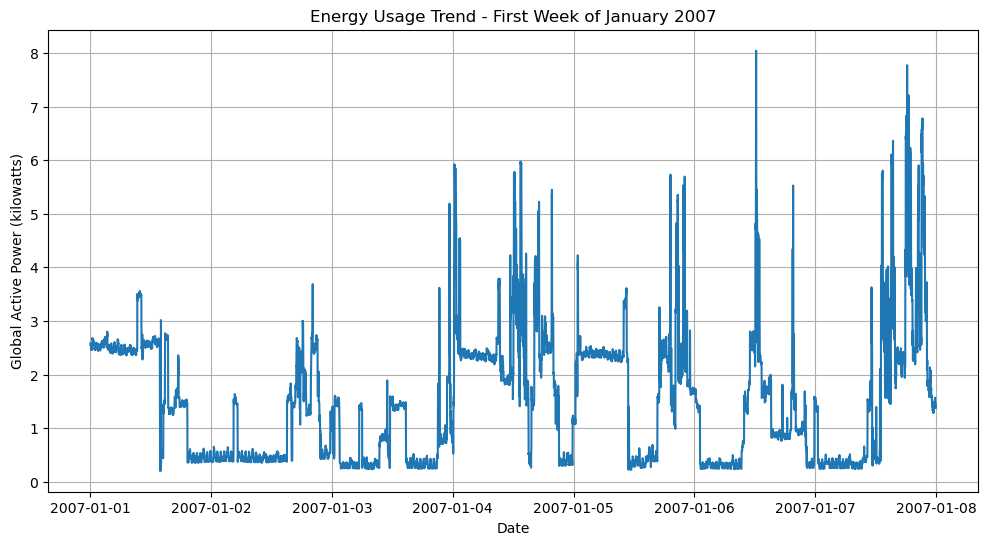

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

first_week = df.loc['2007-01-01':'2007-01-07']['Global_active_power']
plt.figure(figsize=(12, 6))
plt.plot(first_week)
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Energy Usage Trend - First Week of January 2007')
plt.grid(True)
plt.show()

### 6. Find the average voltage for each day of the first week of February 2007.

In [14]:
question = "Find the average voltage for each day of the first week of February 2007"

response = get_code_from_model(question)

print(response)


<think>
Okay, I need to find the average voltage for each day of the first week of February 2007 using the provided dataset. Let me think through the steps.

First, I should start by loading the data as specified. The user provided the code to read the CSV file, so I'll include that. The parameters like sep=';' are important because the data uses semicolons. Also, parsing the 'Date' and 'Time' into a datetime index makes sense. Then, cleaning the data by dropping NA values, converting Global_active_power to float, and setting the datetime index. 

Next, I need to focus on the 'Voltage' column and the specific date range. The first week of February 2007 would be from February 1st to February 7th, 2007. So I should filter the DataFrame to include only those dates. 

To do that, I can slice the DataFrame's index. Since the index is datetime, I can use df.loc['2007-02-01':'2007-02-07'] to get the relevant rows. 

Once I have the filtered data, I need to calculate the daily average. The re

#### Running the code

In [15]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

result = df['2007-02-01':'2007-02-07']['Voltage'].resample('D').mean()
result

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64

### 7. What is the correlation between global active power and sub-metering values?

In [16]:
question = "What is the correlation between global active power and sub-metering values?"

response = get_code_from_model(question)

print(response)


<think>
Okay, the user wants to know the correlation between global active power and the sub-metering values. Let me think about how to approach this.

First, I need to load the dataset properly. The user provided the code to read the CSV, so I'll start with that. They mentioned using pandas, so I'll import that first. The data is separated by semicolons, and the date and time columns need to be parsed into a datetime index. Also, there are some missing values represented by '?', which should be treated as NaN and then dropped. After loading, they clean the data by dropping NA, converting Global_active_power to float, and setting the datetime index. I need to make sure all those steps are included as per their instructions.

Once the data is cleaned, the next step is to calculate the correlation. The user is interested in the correlation between 'Global_active_power' and the sub-metering columns: 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3'. 

To find the correlation, I ca

#### Running the code

In [17]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
result = corr.loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
print(result)

Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64


### 7.1 What is the correlation between global active power and sub-metering values? Give me a plot also

In [23]:
question = "What is the correlation between global active power and sub-metering values? Give me a plot also"

response = get_code_from_model(question)

print(response)


<think>
Okay, the user wants to know the correlation between Global_active_power and the sub-metering values, and also a plot. Let me start by recalling the steps needed.

First, I need to load the data as specified. The user provided the code to load and clean the data, so I should include that. Then, after ensuring the data is clean, I have to calculate the correlation between Global_active_power and each of the Sub_metering columns (1, 2, and 3). 

The correlation can be found using pandas' corr() function. I'll compute the correlation coefficients for each sub-metering column with the Global_active_power. 

For the plot, since they want a visualization, a scatter plot matrix might be useful. Alternatively, maybe a line plot showing the trends over time? Wait, the user just said "a plot also", so perhaps a correlation matrix heatmap would be better to show all correlations at once. Alternatively, scatter plots between each sub-metering and the global power. 

Hmm, the question is a

#### Running the code

Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64


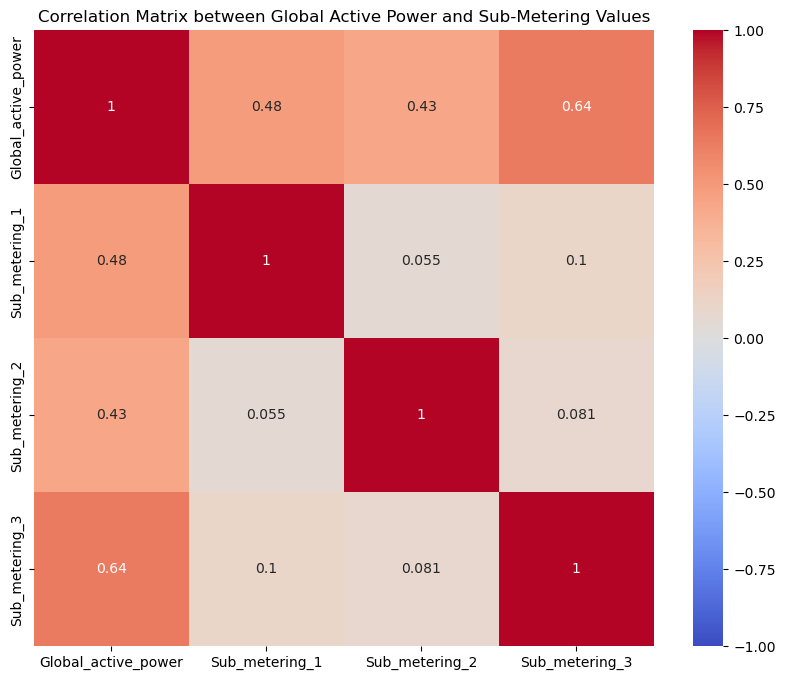

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
corr_matrix = df[cols].corr()

print(corr_matrix.loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Global Active Power and Sub-Metering Values')
plt.show()